<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preliminary-Imports" data-toc-modified-id="Preliminary-Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preliminary Imports</a></span></li><li><span><a href="#Importing-Data-Set" data-toc-modified-id="Importing-Data-Set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing Data Set</a></span></li><li><span><a href="#Initial-Feature-Selection" data-toc-modified-id="Initial-Feature-Selection-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Initial Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Correlation-Coefficient" data-toc-modified-id="Correlation-Coefficient-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correlation Coefficient</a></span></li><li><span><a href="#Drop-Features-By-Correlation" data-toc-modified-id="Drop-Features-By-Correlation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Drop Features By Correlation</a></span></li></ul></li><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stationarity</a></span><ul class="toc-item"><li><span><a href="#Testing-for-Stationarity:-Augmented-Dickey-Fuller-(ADF)" data-toc-modified-id="Testing-for-Stationarity:-Augmented-Dickey-Fuller-(ADF)-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Testing for Stationarity: Augmented Dickey-Fuller (ADF)</a></span></li><li><span><a href="#Differencing-to-Resolve-for-Non-Stationarity" data-toc-modified-id="Differencing-to-Resolve-for-Non-Stationarity-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Differencing to Resolve for Non-Stationarity</a></span></li></ul></li><li><span><a href="#Final-Feature-Selection" data-toc-modified-id="Final-Feature-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final Feature Selection</a></span><ul class="toc-item"><li><span><a href="#Correlation-Matrix" data-toc-modified-id="Correlation-Matrix-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Correlation Matrix</a></span></li><li><span><a href="#Variance-Inflation-Factor-(VIF)" data-toc-modified-id="Variance-Inflation-Factor-(VIF)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Variance Inflation Factor (VIF)</a></span></li><li><span><a href="#Variance-Threshold" data-toc-modified-id="Variance-Threshold-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Variance Threshold</a></span></li></ul></li><li><span><a href="#Time-Series-Decomposition" data-toc-modified-id="Time-Series-Decomposition-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Time Series Decomposition</a></span></li><li><span><a href="#Export-ML-Ready-pandas-DataFrame-to-csv" data-toc-modified-id="Export-ML-Ready-pandas-DataFrame-to-csv-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Export ML Ready pandas DataFrame to csv</a></span></li></ul></div>

### Preliminary Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# Embed generated plots directly within notebook output cells
%matplotlib inline 

### Importing Data Set

In [2]:
clean_stock_data = pd.read_csv('clean_stock_data.csv', index_col='Date', parse_dates=True)
clean_stock_data.head()

,open,high,low,close,volume,5_sma,10_sma,15_sma,20_sma,30_sma,...,open_lag_1,open_lag_2,close_lag_1,close_lag_2,sp500_open,sp500_high,sp500_low,sp500_close,sp500_volume,next_day_close
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-11 00:00:00-04:00,1.80,1.800,1.660,1.67,46200,1.934,2.128,2.247267,2.34995,2.497967,...,1.81,2.00,1.79,1.85,3990.080078,4049.090088,3928.820068,3935.179932,5816140000,1.67
2022-05-12 00:00:00-04:00,1.65,1.670,1.535,1.67,46100,1.822,2.056,2.188733,2.29595,2.457300,...,1.80,1.81,1.67,1.79,3903.949951,3964.800049,3858.870117,3930.080078,6286450000,1.75
2022-05-13 00:00:00-04:00,1.62,1.760,1.620,1.75,50100,1.746,2.004,2.142000,2.24845,2.419300,...,1.65,1.80,1.67,1.67,3963.899902,4038.879883,3963.899902,4023.889893,5183340000,1.73
2022-05-16 00:00:00-04:00,1.81,1.838,1.700,1.73,58800,1.722,1.949,2.093333,2.20895,2.382633,...,1.62,1.65,1.75,1.67,4013.020020,4046.459961,3983.989990,4008.010010,4415030000,1.76
2022-05-17 00:00:00-04:00,1.76,1.820,1.741,1.76,14400,1.716,1.892,2.042667,2.16445,2.348967,...,1.81,1.62,1.73,1.75,4052.000000,4090.719971,4033.929932,4088.850098,4841410000,1.76


In [3]:
# Confirm that all our columns are in the correct data types i.e. either int64 of float64
clean_stock_data.dtypes

open                       float64
high                       float64
low                        float64
close                      float64
volume                       int64
5_sma                      float64
10_sma                     float64
15_sma                     float64
20_sma                     float64
30_sma                     float64
10_ema                     float64
rsi                        float64
bollinger_std              float64
bollinger_upper            float64
bollinger_lower            float64
ema_fast                   float64
ema_slow                   float64
macd                       float64
macd_signal                float64
macd_histogram             float64
stochastic_lowest_low      float64
stochastic_highest_high    float64
pct_k                      float64
pct_d                      float64
open_lag_1                 float64
open_lag_2                 float64
close_lag_1                float64
close_lag_2                float64
sp500_open          

For this project, the feature selection methods will be done both before and after the check for stationarity and potential differencing.


This is mainly for the following reasons:-

1. The feature selection method I have selected, Correlation Coefficient, relies on certain underlying relationships that can be disrupted by differencing. 

2. Feature Selection will help reduce the dimensionality of the data before any potential differencing can be done. This will help enhance the computational efficiency.

3. Sometimes, differencing can increase the noise in the data. If all feature selection is done after differencing, this noise might reflect inaccurate importance of certain features over others.

### Initial Feature Selection

#### Correlation Coefficient

[Correlation coefficients](https://www.investopedia.com/terms/c/correlationcoefficient.asp) are an important measure of the linear relationships between given variables, providing both direction and magnitude. As a general rule, the higher the coefficient, the stronger the relationship, of course, relative to the comparison.

- In this context, the correlation is calculated between each one of the variables, and using the seaborn library, results are displayed on a heatmap.

- The main focus at this stage is the correlation between each feature and the next day’s closing price, which is my selected response variable.


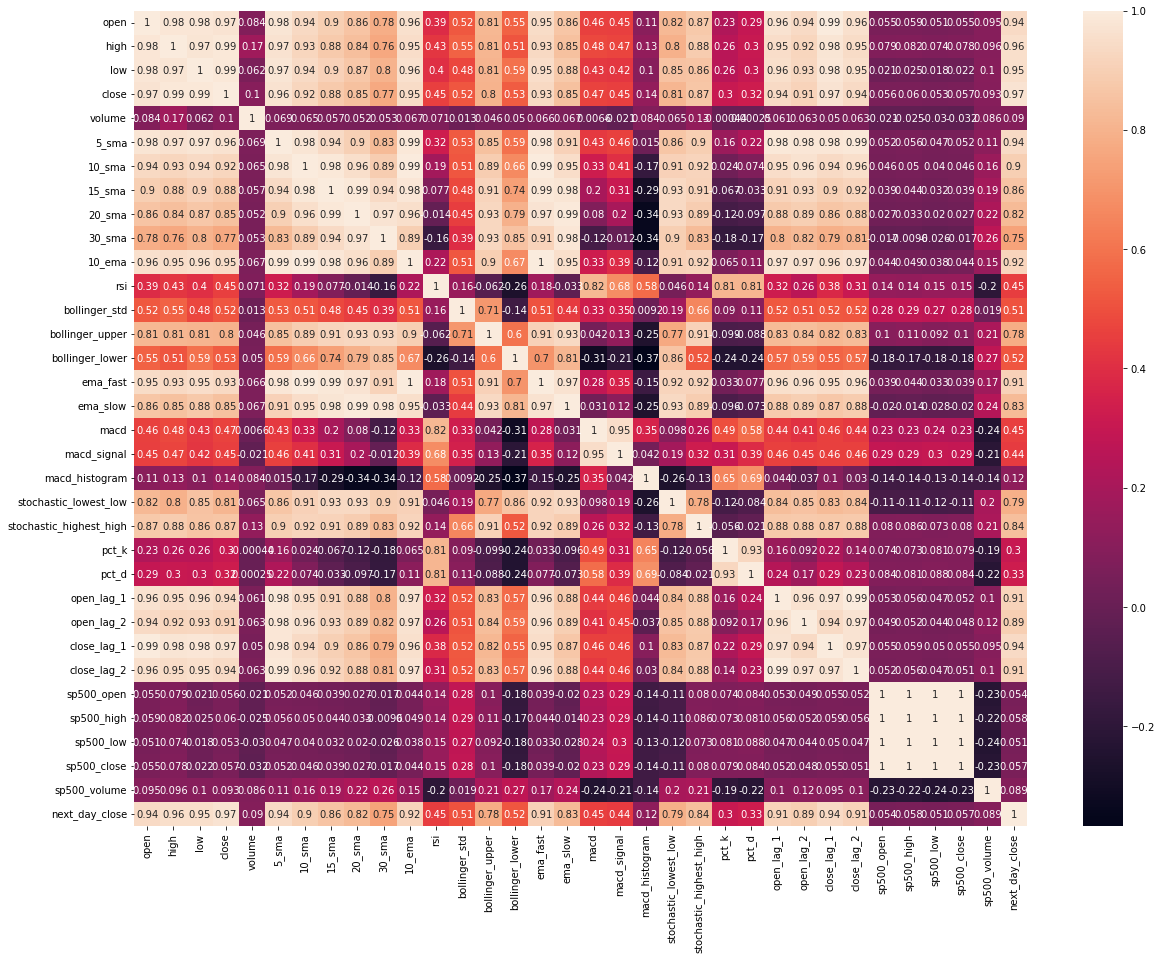

In [4]:
import seaborn as sns

# Correlation matrix
corr_matrix_initial = clean_stock_data.corr()

# Plotting heatmap
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix_initial, annot = True,  ax=ax)
plt.show()

#### Drop Features By Correlation

In [5]:
# Set the target column to which all features will be compared to
target_column = 'next_day_close'  

#Visualize the coefficients
corr_with_target_initial = corr_matrix_initial[target_column].sort_values(ascending=False)
corr_with_target_initial

next_day_close             1.000000
close                      0.968356
high                       0.956013
low                        0.954416
open                       0.941154
5_sma                      0.937837
close_lag_1                0.936369
10_ema                     0.919794
open_lag_1                 0.913068
close_lag_2                0.910769
ema_fast                   0.908309
10_sma                     0.897196
open_lag_2                 0.893872
15_sma                     0.860212
stochastic_highest_high    0.843862
ema_slow                   0.827093
20_sma                     0.824550
stochastic_lowest_low      0.788139
bollinger_upper            0.780606
30_sma                     0.747880
bollinger_lower            0.517759
bollinger_std              0.507696
macd                       0.451622
rsi                        0.446924
macd_signal                0.442292
pct_d                      0.326266
pct_k                      0.300758
macd_histogram             0

In [6]:
# Dropping features by threshold value

# correlation threshold 
lower_threshold = -0.1 
upper_threshold = 0.1

low_correlation_cols = (abs(corr_matrix_initial[target_column]) > lower_threshold) & \
                       (abs(corr_matrix_initial[target_column]) < upper_threshold)

features_to_drop_corr_initial = corr_matrix_initial.columns[low_correlation_cols].tolist()

features_to_drop_corr_initial

['volume',
 'sp500_open',
 'sp500_high',
 'sp500_low',
 'sp500_close',
 'sp500_volume']

From the initial Correlation Coefficients, we can conclude to drop these features. These features had the lowest Correlation Coefficient with the response variable '*next_day_close*'.

In [7]:
# Drop features with least Correlation

# Drop the columns
initial_reduced_stock_data = clean_stock_data.drop(features_to_drop_corr_initial, axis=1)

initial_reduced_stock_data.head()

,open,high,low,close,5_sma,10_sma,15_sma,20_sma,30_sma,10_ema,...,macd_histogram,stochastic_lowest_low,stochastic_highest_high,pct_k,pct_d,open_lag_1,open_lag_2,close_lag_1,close_lag_2,next_day_close
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-11 00:00:00-04:00,1.80,1.800,1.660,1.67,1.934,2.128,2.247267,2.34995,2.497967,2.072478,...,-0.067797,1.660,2.607,1.055965,8.778211,1.81,2.00,1.79,1.85,1.67
2022-05-12 00:00:00-04:00,1.65,1.670,1.535,1.67,1.822,2.056,2.188733,2.29595,2.457300,1.999300,...,-0.069378,1.535,2.600,12.676056,7.927421,1.80,1.81,1.67,1.79,1.75
2022-05-13 00:00:00-04:00,1.62,1.760,1.620,1.75,1.746,2.004,2.142000,2.24845,2.419300,1.953973,...,-0.059954,1.535,2.600,20.187798,11.306606,1.65,1.80,1.67,1.67,1.73
2022-05-16 00:00:00-04:00,1.81,1.838,1.700,1.73,1.722,1.949,2.093333,2.20895,2.382633,1.913250,...,-0.050372,1.535,2.600,18.309865,17.057906,1.62,1.65,1.75,1.67,1.76
2022-05-17 00:00:00-04:00,1.76,1.820,1.741,1.76,1.716,1.892,2.042667,2.16445,2.348967,1.885387,...,-0.037888,1.535,2.520,22.842642,20.446768,1.81,1.62,1.73,1.75,1.76


### Stationarity 

#### Testing for Stationarity: Augmented Dickey-Fuller (ADF)

Before performing the [ADF test](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/), we need to ensure:-

- The columns we will be working with are all numerical

The [Augmented Dickey-Fuller (ADF)](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/) is a statistical significance test, ergo it has hypothesis testing against the output p-value. For my use case:


- The significance level of the p-value is 0.05.

- The null hypothesis (that the Time Series is not stationary) is rejected when I compare the p-value to the significance level of 0.05 and find the p-value to be greater. Therefore, the Time Series is NOT stationary.

- The null hypothesis is NOT rejected when I compare the p-value to the significance level of 0.05 and find the p-value to be less. Therefore, the Time Series is stationary.
    
    - The Alternate Hypothesis (HA) states that the Time Series is stationary.


In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
# Defining a function to perform ADF test on the dataset and return the results in a pandas DataFrame.

# Display the results in a dataframe to make it visually easier to read

def perform_adf_test(data):
    results = [] #store results as a list of dictionaries
    for col in data.columns:
        adf_result = adfuller(data[col].dropna())  # Handle potential NaN values (just in case)
        result_dict = {
            'adf_stat': round(adf_result[0], 6),   # Round ADF Statistic
            'p_value': round(adf_result[1], 6),    # Round p-value
            'n_lags': adf_result[2],
        }
        # Expand critical values into separate columns
        for key, value in adf_result[4].items():
            result_dict[f'crit_{key}'] = round(value, 6) 
            
        results.append(result_dict)
    return pd.DataFrame(results, index=data.columns)

# Call the function to check for stationarity on the final_hist_ekso DataFrame
#perform_adf_test(reduced_final_hist_ekso2)
perform_adf_test(initial_reduced_stock_data)

,adf_stat,p_value,n_lags,crit_1%,crit_5%,crit_10%
open,-2.473937,0.121945,6,-3.444491,-2.867776,-2.570091
high,-2.383028,0.146584,3,-3.444400,-2.867736,-2.570070
low,-2.611958,0.090551,1,-3.444340,-2.867709,-2.570056
close,-2.350728,0.156129,10,-3.444615,-2.867830,-2.570120
5_sma,-2.521349,0.110366,16,-3.444804,-2.867913,-2.570165
10_sma,-2.443171,0.129920,15,-3.444772,-2.867899,-2.570157
15_sma,-2.949176,0.039921,16,-3.444804,-2.867913,-2.570165
20_sma,-2.715708,0.071359,9,-3.444584,-2.867816,-2.570113
30_sma,-2.564649,0.100526,18,-3.444868,-2.867941,-2.570180
10_ema,-2.237129,0.193047,1,-3.444340,-2.867709,-2.570056


#### Differencing to Resolve for Non-Stationarity

In [10]:
# Performs differencing on DataFrame columns until stationarity is reached

def achieve_stationarity(data, significance_level=0.05):
    data_transformed = data.copy()
    differencing_order = {}
    for col in data_transformed.columns:
        order = 0
        result = adfuller(data_transformed[col].dropna())

        while result[1] > significance_level:
            data_transformed[col] = data_transformed[col].diff().dropna()
            order += 1
            result = adfuller(data_transformed[col].dropna())

        differencing_order[col] = order

    return data_transformed, differencing_order 

In [11]:
#transformed_ekso, diff_order = achieve_stationarity(reduced_final_hist_ekso2, significance_level=0.05)
diff_stock_data, diff_order = achieve_stationarity(initial_reduced_stock_data, significance_level=0.05)


In [12]:
# Call the function to check for stationarity on the transformed_ekso DataFrame
perform_adf_test(diff_stock_data)

,adf_stat,p_value,n_lags,crit_1%,crit_5%,crit_10%
open,-9.139796,0.000000,6,-3.444522,-2.867789,-2.570099
high,-14.521662,0.000000,2,-3.444400,-2.867736,-2.570070
low,-6.614369,0.000000,12,-3.444709,-2.867871,-2.570142
close,-8.945079,0.000000,7,-3.444553,-2.867803,-2.570106
5_sma,-4.519232,0.000181,15,-3.444804,-2.867913,-2.570165
10_sma,-4.378362,0.000324,14,-3.444772,-2.867899,-2.570157
15_sma,-2.949176,0.039921,16,-3.444804,-2.867913,-2.570165
20_sma,-4.544193,0.000163,14,-3.444772,-2.867899,-2.570157
30_sma,-3.272882,0.016135,17,-3.444868,-2.867941,-2.570180
10_ema,-6.525359,0.000000,5,-3.444491,-2.867776,-2.570091


- Since repeatedly differencing can in some instances lead to over-fitting, I am checking to see how many times a column has been differenced. I opted for this approach rather than setting the limit on the maximum number of differencing iterations over each column.

In [13]:
# Check what the differencing order was used for each variable
print(diff_order)

{'open': 1, 'high': 1, 'low': 1, 'close': 1, '5_sma': 1, '10_sma': 1, '15_sma': 0, '20_sma': 1, '30_sma': 1, '10_ema': 1, 'rsi': 0, 'bollinger_std': 0, 'bollinger_upper': 1, 'bollinger_lower': 1, 'ema_fast': 1, 'ema_slow': 1, 'macd': 0, 'macd_signal': 0, 'macd_histogram': 0, 'stochastic_lowest_low': 1, 'stochastic_highest_high': 1, 'pct_k': 0, 'pct_d': 0, 'open_lag_1': 1, 'open_lag_2': 1, 'close_lag_1': 1, 'close_lag_2': 1, 'next_day_close': 1}


In [14]:
diff_stock_data.head()

,open,high,low,close,5_sma,10_sma,15_sma,20_sma,30_sma,10_ema,...,macd_histogram,stochastic_lowest_low,stochastic_highest_high,pct_k,pct_d,open_lag_1,open_lag_2,close_lag_1,close_lag_2,next_day_close
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-11 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,2.247267,NaN,NaN,NaN,...,-0.067797,NaN,NaN,1.055965,8.778211,NaN,NaN,NaN,NaN,NaN
2022-05-12 00:00:00-04:00,-0.15,-0.130,-0.125,0.00,-0.112,-0.072,2.188733,-0.0540,-0.040667,-0.073178,...,-0.069378,-0.125,-0.007,12.676056,7.927421,-0.01,-0.19,-0.12,-0.06,0.08
2022-05-13 00:00:00-04:00,-0.03,0.090,0.085,0.08,-0.076,-0.052,2.142000,-0.0475,-0.038000,-0.045327,...,-0.059954,0.000,0.000,20.187798,11.306606,-0.15,-0.01,0.00,-0.12,-0.02
2022-05-16 00:00:00-04:00,0.19,0.078,0.080,-0.02,-0.024,-0.055,2.093333,-0.0395,-0.036667,-0.040722,...,-0.050372,0.000,0.000,18.309865,17.057906,-0.03,-0.15,0.08,0.00,0.03
2022-05-17 00:00:00-04:00,-0.05,-0.018,0.041,0.03,-0.006,-0.057,2.042667,-0.0445,-0.033667,-0.027864,...,-0.037888,0.000,-0.080,22.842642,20.446768,0.19,-0.03,-0.02,0.08,0.00


In [15]:
# Since differencing leads to creation of null values, let's remove those
diff_stock_data = diff_stock_data[diff_stock_data.notna().all(axis=1)]
diff_stock_data.head()

,open,high,low,close,5_sma,10_sma,15_sma,20_sma,30_sma,10_ema,...,macd_histogram,stochastic_lowest_low,stochastic_highest_high,pct_k,pct_d,open_lag_1,open_lag_2,close_lag_1,close_lag_2,next_day_close
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-12 00:00:00-04:00,-0.15,-0.130,-0.125,0.00,-0.112,-0.072,2.188733,-0.0540,-0.040667,-0.073178,...,-0.069378,-0.125,-0.007,12.676056,7.927421,-0.01,-0.19,-0.12,-0.06,0.08
2022-05-13 00:00:00-04:00,-0.03,0.090,0.085,0.08,-0.076,-0.052,2.142000,-0.0475,-0.038000,-0.045327,...,-0.059954,0.000,0.000,20.187798,11.306606,-0.15,-0.01,0.00,-0.12,-0.02
2022-05-16 00:00:00-04:00,0.19,0.078,0.080,-0.02,-0.024,-0.055,2.093333,-0.0395,-0.036667,-0.040722,...,-0.050372,0.000,0.000,18.309865,17.057906,-0.03,-0.15,0.08,0.00,0.03
2022-05-17 00:00:00-04:00,-0.05,-0.018,0.041,0.03,-0.006,-0.057,2.042667,-0.0445,-0.033667,-0.027864,...,-0.037888,0.000,-0.080,22.842642,20.446768,0.19,-0.03,-0.02,0.08,0.00
2022-05-18 00:00:00-04:00,0.07,0.010,0.019,0.00,0.018,-0.058,1.996667,-0.0455,-0.034333,-0.022798,...,-0.026067,0.000,0.000,22.842642,21.331716,-0.05,0.19,0.03,-0.02,0.04


### Final Feature Selection

Changes Relationships: As discussed previously, differencing alters the relationships between your features. While it has the potential to reduce multicollinearity, it's not guaranteed.  Some features might still be highly correlated with each other in terms of their changes.

#### Correlation Matrix

<AxesSubplot:>

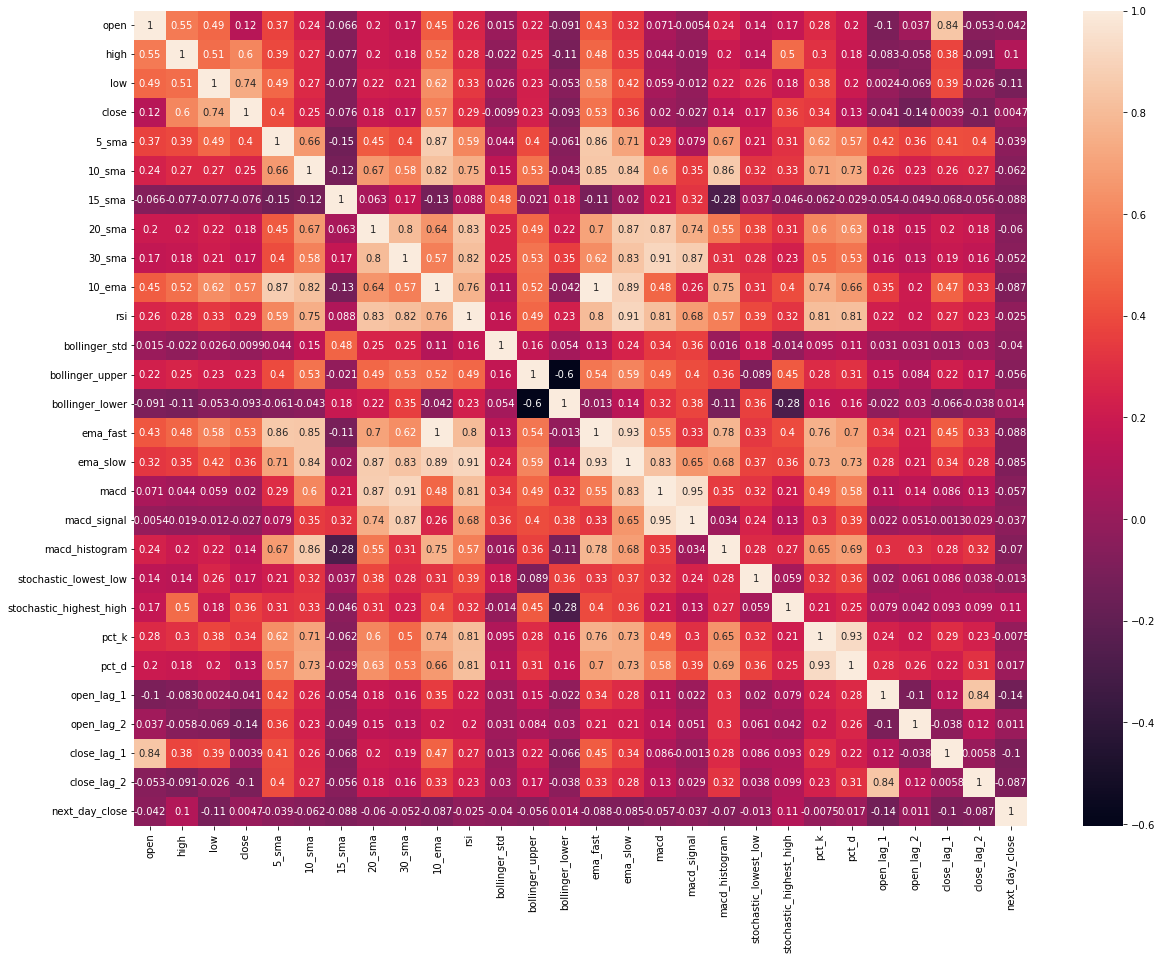

In [16]:
# Correlation matrix
corr_matrix_final = diff_stock_data.corr()

# Plotting heatmap
plt.figure(figsize =(20,15))
sns.heatmap(corr_matrix_final, annot = True)

In [17]:
target_column = 'next_day_close'

corr_with_target_final = corr_matrix_final[target_column].sort_values(ascending=False)
corr_with_target_final

next_day_close             1.000000
stochastic_highest_high    0.110199
high                       0.100709
pct_d                      0.017264
bollinger_lower            0.013637
open_lag_2                 0.010630
close                      0.004673
pct_k                     -0.007464
stochastic_lowest_low     -0.012733
rsi                       -0.024829
macd_signal               -0.036899
5_sma                     -0.039046
bollinger_std             -0.040047
open                      -0.042028
30_sma                    -0.051564
bollinger_upper           -0.056264
macd                      -0.056589
20_sma                    -0.060495
10_sma                    -0.062138
macd_histogram            -0.069568
ema_slow                  -0.085140
10_ema                    -0.086770
close_lag_2               -0.087025
ema_fast                  -0.088033
15_sma                    -0.088046
close_lag_1               -0.100681
low                       -0.111676
open_lag_1                -0

In [18]:
# Dropping features by threshold value

# correlation threshold 
lower_threshold = -0.01
upper_threshold = 0.01

low_corr_cols = (abs(corr_matrix_final[target_column]) > lower_threshold) & \
                       (abs(corr_matrix_final[target_column]) < upper_threshold)


features_to_drop_corr_final = corr_matrix_final.columns[low_corr_cols].tolist()

features_to_drop_corr_final

['close', 'pct_k']

In [19]:
# Drop features with least Correlation

# Drop the columns
final_reduced_stock_data = diff_stock_data.drop(features_to_drop_corr_final, axis=1)

final_reduced_stock_data.head()

,open,high,low,5_sma,10_sma,15_sma,20_sma,30_sma,10_ema,rsi,...,macd_signal,macd_histogram,stochastic_lowest_low,stochastic_highest_high,pct_d,open_lag_1,open_lag_2,close_lag_1,close_lag_2,next_day_close
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-12 00:00:00-04:00,-0.15,-0.130,-0.125,-0.112,-0.072,2.188733,-0.0540,-0.040667,-0.073178,13.724601,...,-0.183394,-0.069378,-0.125,-0.007,7.927421,-0.01,-0.19,-0.12,-0.06,0.08
2022-05-13 00:00:00-04:00,-0.03,0.090,0.085,-0.076,-0.052,2.142000,-0.0475,-0.038000,-0.045327,20.800162,...,-0.198383,-0.059954,0.000,0.000,11.306606,-0.15,-0.01,0.00,-0.12,-0.02
2022-05-16 00:00:00-04:00,0.19,0.078,0.080,-0.024,-0.055,2.093333,-0.0395,-0.036667,-0.040722,20.350817,...,-0.210976,-0.050372,0.000,0.000,17.057906,-0.03,-0.15,0.08,0.00,0.03
2022-05-17 00:00:00-04:00,-0.05,-0.018,0.041,-0.006,-0.057,2.042667,-0.0445,-0.033667,-0.027864,23.036614,...,-0.220448,-0.037888,0.000,-0.080,20.446768,0.19,-0.03,-0.02,0.08,0.00
2022-05-18 00:00:00-04:00,0.07,0.010,0.019,0.018,-0.058,1.996667,-0.0455,-0.034333,-0.022798,23.036614,...,-0.226964,-0.026067,0.000,0.000,21.331716,-0.05,0.19,0.03,-0.02,0.04


#### Variance Inflation Factor (VIF)

The [Variance Inflation Factor](https://www.investopedia.com/terms/v/variance-inflation-factor.asp) measures how much the variance of one feature is increased due to its correlation with other features.

- Typically, High VIF values indicate multicollinearity. For my calculation, I used the recommended value of 5 as the cut off point.


In [20]:
# Calculate VIF and show in a DataFrame
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    #vif['Rounded_VIF'] = vif['VIF'].round(10)  # Round VIF to 10 decimal places
    return vif


calc_vif(final_reduced_stock_data)


C:\Users\onyab\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,features,VIF
0,open,7.446960e+00
1,high,3.232263e+00
2,low,4.245235e+00
3,5_sma,8.696958e+00
4,10_sma,1.112980e+01
5,15_sma,2.692924e+01
6,20_sma,1.221743e+01
7,30_sma,inf
8,10_ema,7.950380e+05
9,rsi,3.487219e+01


In [21]:
# Extract predictor variables (excluding the target variable)
X = final_reduced_stock_data.drop('next_day_close', axis=1)

# Calculate VIF for each predictor variable
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display variables with5> 5
print(vif[vif['VIF'] > 5])

C:\Users\onyab\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


           Variable           VIF
0              open  7.439280e+00
3             5_sma  8.536046e+00
4            10_sma  1.112259e+01
5            15_sma  2.636545e+01
6            20_sma  1.221396e+01
7            30_sma           inf
8            10_ema  7.933705e+05
9               rsi  3.479185e+01
11  bollinger_upper           inf
12  bollinger_lower           inf
13         ema_fast           inf
14         ema_slow           inf
15             macd           inf
16      macd_signal           inf
17   macd_histogram           inf
20            pct_d  1.247299e+01
21       open_lag_1  7.178116e+00
23      close_lag_1  6.525852e+00
24      close_lag_2  5.761998e+00


In [22]:
# Identify columns with VIF > 5
high_vif_columns = vif[vif['VIF'] > 5]['Variable'].tolist() 

# Drop high VIF columns
final_reduced_stock_data = final_reduced_stock_data.drop(columns=high_vif_columns) 

final_reduced_stock_data.head()

,high,low,bollinger_std,stochastic_lowest_low,stochastic_highest_high,open_lag_2,next_day_close
Date,,,,,,,
2022-05-12 00:00:00-04:00,-0.130,-0.125,0.320393,-0.125,-0.007,-0.19,0.08
2022-05-13 00:00:00-04:00,0.090,0.085,0.327676,0.000,0.000,-0.01,-0.02
2022-05-16 00:00:00-04:00,0.078,0.080,0.340580,0.000,0.000,-0.15,0.03
2022-05-17 00:00:00-04:00,-0.018,0.041,0.338054,0.000,-0.080,-0.03,0.00
2022-05-18 00:00:00-04:00,0.010,0.019,0.327504,0.000,0.000,0.19,0.04


#### Variance Threshold

Naturally, after the differencing process is done to make the time series stationary, some features that do not change a lot through the time series end up with either 0.0 or near 0 values, essentially becoming constant features. 

This is a common side effect of differencing where the trends that once existed are now removed.

The [Variance Threshold](https://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9) selector used, helped to double-check for any features that fell below the threshold, hence helped filter out features where the changes exhibited minimal fluctuation.


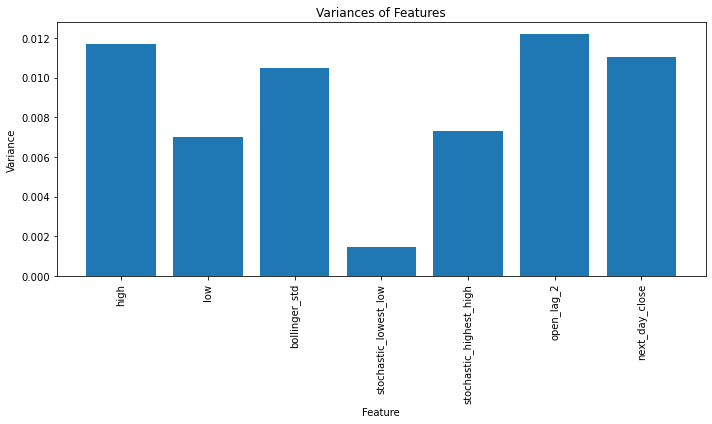

In [23]:
from sklearn.feature_selection import VarianceThreshold

# Create a Variance Threshold selector to remove features
selector = VarianceThreshold(threshold=0)

# Fit the selector to the data
selector.fit(final_reduced_stock_data)

# Get the variances of the features
variances = selector.variances_

# Create a bar chart to visualize the variances
plt.figure(figsize=(10, 6))
plt.bar(final_reduced_stock_data.columns, variances)
plt.xlabel("Feature")
plt.ylabel("Variance")
plt.title("Variances of Features")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [24]:
from sklearn.feature_selection import VarianceThreshold

# Preserve the DateTime index
original_index = final_reduced_stock_data.index 

#. Fit and Transform
transformed_values = selector.fit_transform(final_reduced_stock_data)

#. Observe Results
print("Original number of features:", final_reduced_stock_data.shape[1])
print("Number of features after Variance Threshold:", transformed_values.shape[1])

# Create and output new DataFrame
transformed_stock_data = pd.DataFrame(transformed_values, index=original_index)
transformed_stock_data.columns = selector.get_feature_names_out(final_reduced_stock_data.columns) 


Original number of features: 7
Number of features after Variance Threshold: 7


In [25]:
transformed_stock_data.head()

,high,low,bollinger_std,stochastic_lowest_low,stochastic_highest_high,open_lag_2,next_day_close
Date,,,,,,,
2022-05-12 00:00:00-04:00,-0.130,-0.125,0.320393,-0.125,-0.007,-0.19,0.08
2022-05-13 00:00:00-04:00,0.090,0.085,0.327676,0.000,0.000,-0.01,-0.02
2022-05-16 00:00:00-04:00,0.078,0.080,0.340580,0.000,0.000,-0.15,0.03
2022-05-17 00:00:00-04:00,-0.018,0.041,0.338054,0.000,-0.080,-0.03,0.00
2022-05-18 00:00:00-04:00,0.010,0.019,0.327504,0.000,0.000,0.19,0.04


### Time Series Decomposition

***This part was mainly for informing my decisions during the iterative process.***

[Time Series Decomposition](https://www.influxdata.com/blog/time-series-decomposition/#:~:text=Time%20series%20decomposition%20is%20a,variations%20within%20time%20series%20datasets.) breaks down a time-dependent dataset into several distinct components, making it easier to understand the underlying patterns and drivers of change. These core components are:

- *Trend*: The long-term direction of the data i.e. overall trajectory flat, upward or downward.

- *Seasonality*: Repeating, regular fluctuations over the period.

- *Cycle*: Non-periodic oscillations that might span multiple years such as those patterns that are tied to economic cycles.

- *Residual (or Noise)*: The unexplained variation left after accounting for other components. 


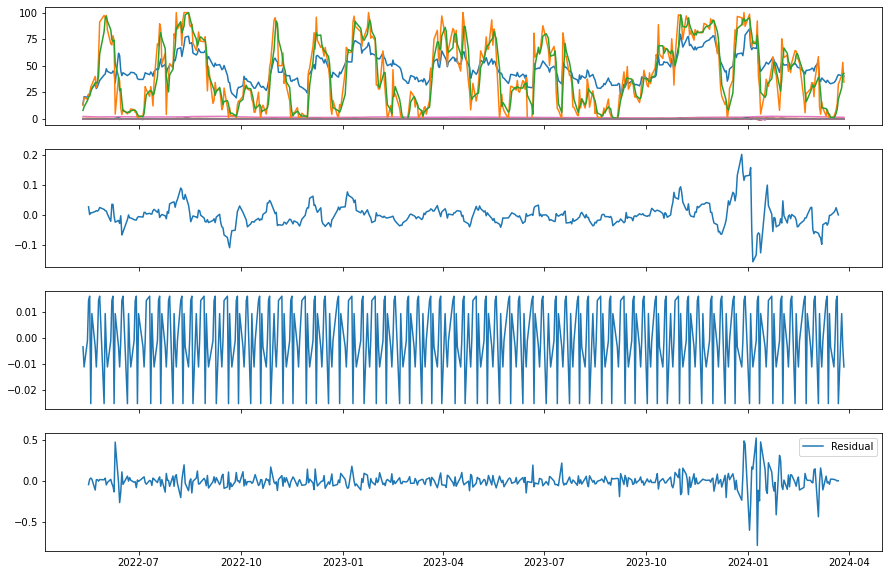

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert index to DatetimeIndex and set frequency
#reduced_final_hist_ekso.index = pd.date_range(start='2020-05-11')

# Decomposition
decomp_result = seasonal_decompose(transformed_stock_data['next_day_close'], model='additive', period=7)  # Assuming additive seasonality

# Extract components
trend = decomp_result.trend
seasonal = decomp_result.seasonal
residual = decomp_result.resid

# Plot results
fig, axes = plt.subplots(4, 1,sharex=True, figsize=(15, 10))  # Plot in subplots
axes[0].plot(diff_stock_data, label='Original')
axes[1].plot(trend, label='Trend')
axes[2].plot(seasonal, label='Seasonal')
axes[3].plot(residual, label='Residual')
plt.legend()
plt.show()

### Export ML Ready pandas DataFrame to csv

In [27]:
# Exporting the differenced data
transformed_stock_data.to_csv('ml_ready_stock_data.csv', index=True)

This is the End of this Notebook